
<a href="https://colab.research.google.com/github/aleylani/Databehandling/blob/main/exercises/E01_missing_aggregation.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Missing data and aggregations exercises

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('test test')

test test


## 1. Find missing values (*)

&nbsp; a) Read in the file "student-mat-missing-data.csv" found in the course github repo into a Pandas DataFrame

You can read more about this dataset and the columns here https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

&nbsp; b) Do some initial explorations with the methods to get an understanding of the dataset:
```py
head(), info(), describe(), value_counts(), unique(), columns
```

&nbsp; c) Create a function that takes in a DataFrame as input parameter and plots a histplot with the columns that have missing values.
          
Here's the official documentation for Seaborn histplot https://seaborn.pydata.org/generated/seaborn.histplot.html

&nbsp; d) Find all rows where the freetime is NaN.   

&nbsp; e) Find all rows where the freetime **or** the age is NaN. 
        
For this task, you might find this site useful https://builtin.com/data-science/pandas-filter

&nbsp; f) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

<details>
<summary>Hint</summary>

&nbsp; c) Use 
```py
isnull()
```
in combination with aggregation functions such as 
```py
sum()
```

Use seaborn to plot

f) use bitwise or: | 


</details>

<br/>

<details>

<summary>Answer</summary>

d)

![null values graph](../assets/null_vals_student.png)

e) 

These row indices: 
[87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]
 
f) 

These row indices:
[20,  71,  87,  99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]

g) 

These rows constitutes 0.0127 of the dataset

h)

![null values graph after cleaned once](../assets/null_vals_student_2.png)

</details>

In [2]:
# A) Read the file
path = '../data/student-mat-missing-data.csv'
finding_missing_df = pd.read_csv(path)

finding_missing_df.head(7)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10
5,5,GP,M,16.0,U,LE3,T,4,3,services,...,5.0,4.0,2.0,1,2,5.0,10.0,15,15,15
6,6,GP,M,16.0,U,LE3,T,2,2,other,...,4.0,4.0,4.0,1,1,3.0,0.0,12,12,11


In [3]:
# B) initial exploration
finding_missing_df.info()
    # 3   age         381 non-null    float64
    # 4   address     390 non-null    object 
    # 24  famrel      390 non-null    float64
    # 25  freetime    379 non-null    float64
    # 26  goout       390 non-null    float64
    # 29  health      390 non-null    float64
    # 30  absences    390 non-null    float64
#finding_missing_df.describe() # Ger antal, medelvärde, standardavikelse och allt som behövs för ett lådagram
#finding_missing_df['studytime'].value_counts()
#finding_missing_df['Pstatus'].nunique()
#finding_missing_df['freetime'].nunique()
#finding_missing_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  395 non-null    int64  
 1   school      395 non-null    object 
 2   sex         395 non-null    object 
 3   age         381 non-null    float64
 4   address     390 non-null    object 
 5   famsize     395 non-null    object 
 6   Pstatus     395 non-null    object 
 7   Medu        395 non-null    int64  
 8   Fedu        395 non-null    int64  
 9   Mjob        395 non-null    object 
 10  Fjob        395 non-null    object 
 11  reason      395 non-null    object 
 12  guardian    395 non-null    object 
 13  traveltime  395 non-null    int64  
 14  studytime   395 non-null    int64  
 15  failures    395 non-null    int64  
 16  schoolsup   395 non-null    object 
 17  famsup      395 non-null    object 
 18  paid        395 non-null    object 
 19  activities  395 non-null    o

In [4]:
## C) create a function that takes in a DataFrame as input parameter and plots a histplot with the columns that have missing values
# fattar inte frågan historgram borde väl ändå vara numeriska värden på både x och y axeln.
def barplot_of_missing(df : pd.DataFrame) -> None:
    all_missing_df = df.loc[:, df.isnull().any()]
    missing_serie = all_missing_df.isnull().sum()
    missing_df = pd.DataFrame({'Columns': missing_serie.index, 'Missing values': missing_serie.values})
    sns.barplot(missing_df, x = 'Columns', y = 'Missing values', hue = 'Columns')
    plt.show()

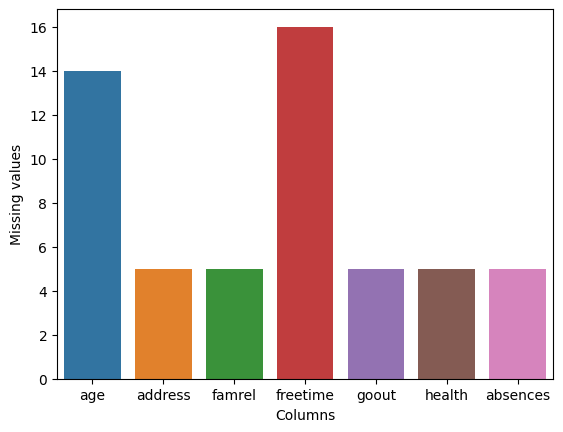

In [5]:
barplot_of_missing(finding_missing_df)

In [6]:
# D) Find all rows where the freetime is NaN
freetime_missing_mask = finding_missing_df['freetime'].isnull()
finding_missing_df[freetime_missing_mask]

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14
160,160,GP,M,NaN,NaN,LE3,T,2,1,at_home,...,NaN,NaN,NaN,2,2,NaN,NaN,7,6,0
191,191,GP,F,NaN,NaN,GT3,T,1,1,at_home,...,NaN,NaN,NaN,1,1,NaN,NaN,8,8,9
257,257,GP,M,19.0,U,LE3,A,4,3,services,...,4.0,NaN,1.0,1,1,1.0,12.0,11,11,11
276,276,GP,F,NaN,NaN,GT3,A,3,2,other,...,NaN,NaN,NaN,1,1,NaN,NaN,10,9,9
293,293,GP,F,NaN,NaN,LE3,T,3,1,services,...,NaN,NaN,NaN,1,1,NaN,NaN,18,18,18


In [7]:
# E) Find all rows where the age is NsN
age_missing_mask = finding_missing_df['age'].isnull()
finding_missing_df[age_missing_mask]



,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
20,20,GP,M,NaN,U,GT3,T,4,3,teacher,...,4.0,4.0,1.0,1,1,1.0,0.0,13,14,15
71,71,GP,M,NaN,U,GT3,T,4,2,other,...,3.0,3.0,3.0,1,1,3.0,0.0,10,10,10
102,102,GP,M,NaN,U,GT3,T,4,4,services,...,5.0,3.0,3.0,1,1,5.0,4.0,10,13,14
106,106,GP,F,NaN,U,GT3,T,2,2,other,...,5.0,1.0,2.0,1,1,3.0,8.0,7,8,8
121,121,GP,M,NaN,U,GT3,T,2,2,services,...,5.0,5.0,4.0,1,2,5.0,6.0,16,14,15
160,160,GP,M,NaN,NaN,LE3,T,2,1,at_home,...,NaN,NaN,NaN,2,2,NaN,NaN,7,6,0
188,188,GP,F,NaN,U,GT3,A,3,3,health,...,3.0,3.0,3.0,1,3,3.0,6.0,8,7,9
191,191,GP,F,NaN,NaN,GT3,T,1,1,at_home,...,NaN,NaN,NaN,1,1,NaN,NaN,8,8,9
214,214,GP,F,NaN,R,LE3,T,4,4,services,...,5.0,2.0,1.0,1,2,3.0,12.0,8,10,10
270,270,GP,F,NaN,U,GT3,T,3,3,other,...,4.0,3.0,5.0,3,3,5.0,15.0,9,9,9


In [8]:
# E) fortsatt hur man får värderna som saknar båda har ju Ali visat
finding_missing_df[freetime_missing_mask & age_missing_mask]

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
160,160,GP,M,NaN,NaN,LE3,T,2,1,at_home,...,NaN,NaN,NaN,2,2,NaN,NaN,7,6,0
191,191,GP,F,NaN,NaN,GT3,T,1,1,at_home,...,NaN,NaN,NaN,1,1,NaN,NaN,8,8,9
276,276,GP,F,NaN,NaN,GT3,A,3,2,other,...,NaN,NaN,NaN,1,1,NaN,NaN,10,9,9
293,293,GP,F,NaN,NaN,LE3,T,3,1,services,...,NaN,NaN,NaN,1,1,NaN,NaN,18,18,18
385,385,MS,F,NaN,NaN,GT3,T,2,2,at_home,...,NaN,NaN,NaN,1,3,NaN,NaN,10,9,10


In [9]:
# E) fortsättning. Men det var inte uppgiften testar |
finding_missing_df[freetime_missing_mask | age_missing_mask]

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
20,20,GP,M,NaN,U,GT3,T,4,3,teacher,...,4.0,4.0,1.0,1,1,1.0,0.0,13,14,15
71,71,GP,M,NaN,U,GT3,T,4,2,other,...,3.0,3.0,3.0,1,1,3.0,0.0,10,10,10
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
102,102,GP,M,NaN,U,GT3,T,4,4,services,...,5.0,3.0,3.0,1,1,5.0,4.0,10,13,14
106,106,GP,F,NaN,U,GT3,T,2,2,other,...,5.0,1.0,2.0,1,1,3.0,8.0,7,8,8
121,121,GP,M,NaN,U,GT3,T,2,2,services,...,5.0,5.0,4.0,1,2,5.0,6.0,16,14,15
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14


In [10]:
# F) Compute the proportion the rows containing several NaN are of the hole data set
# tidigare så sorterade vi ju ut columnerna med NaN
all_missing_df = finding_missing_df.loc[:, finding_missing_df.isnull().any()]
all_missing_df

,age,address,famrel,freetime,goout,health,absences
0,18.0,U,4.0,3.0,4.0,3.0,6.0
1,17.0,U,5.0,3.0,3.0,3.0,4.0
2,15.0,U,4.0,3.0,2.0,3.0,10.0
3,15.0,U,3.0,2.0,2.0,5.0,2.0
4,16.0,U,4.0,3.0,2.0,5.0,4.0
...,...,...,...,...,...,...,...
390,20.0,U,5.0,5.0,4.0,4.0,11.0
391,17.0,U,2.0,4.0,5.0,2.0,3.0
392,21.0,R,5.0,5.0,3.0,3.0,3.0
393,18.0,R,4.0,4.0,1.0,5.0,0.0


In [11]:
# F) fortsättning istället för kolumnerna vill vi ju ha raderna med NaN
all_missing_df = finding_missing_df.loc[finding_missing_df.isnull().any(axis=1), :]
all_missing_df
# Ok så 25 rader som innehåller minst en NaN 25/395 = ca 0.063 enligt facit är andelen 0.0127 
# 33 Rubriker enlig info.() så vad skulle vara sevral... 7?

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
20,20,GP,M,NaN,U,GT3,T,4,3,teacher,...,4.0,4.0,1.0,1,1,1.0,0.0,13,14,15
71,71,GP,M,NaN,U,GT3,T,4,2,other,...,3.0,3.0,3.0,1,1,3.0,0.0,10,10,10
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
102,102,GP,M,NaN,U,GT3,T,4,4,services,...,5.0,3.0,3.0,1,1,5.0,4.0,10,13,14
106,106,GP,F,NaN,U,GT3,T,2,2,other,...,5.0,1.0,2.0,1,1,3.0,8.0,7,8,8
121,121,GP,M,NaN,U,GT3,T,2,2,services,...,5.0,5.0,4.0,1,2,5.0,6.0,16,14,15
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14


In [12]:
all_missing_df.isnull().sum(axis=1)
# Här ser vi att de flesta endast saknar ett värde medan ett gäng saknar 7

20     1
71     1
87     1
99     1
102    1
106    1
121    1
130    1
149    1
151    1
160    7
188    1
191    7
214    1
257    1
270    1
276    7
293    7
308    1
330    1
343    1
348    1
359    1
372    1
385    7
dtype: int64

In [13]:
sevral_missing = all_missing_df.isnull().sum(axis=1) > 5
all_missing_df[sevral_missing]
# 5/395= 

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
160,160,GP,M,NaN,NaN,LE3,T,2,1,at_home,...,NaN,NaN,NaN,2,2,NaN,NaN,7,6,0
191,191,GP,F,NaN,NaN,GT3,T,1,1,at_home,...,NaN,NaN,NaN,1,1,NaN,NaN,8,8,9
276,276,GP,F,NaN,NaN,GT3,A,3,2,other,...,NaN,NaN,NaN,1,1,NaN,NaN,10,9,9
293,293,GP,F,NaN,NaN,LE3,T,3,1,services,...,NaN,NaN,NaN,1,1,NaN,NaN,18,18,18
385,385,MS,F,NaN,NaN,GT3,T,2,2,at_home,...,NaN,NaN,NaN,1,3,NaN,NaN,10,9,10


In [14]:
5/395
# Vilket skulle visas, typ ;) 

0.012658227848101266

---
## 2. Clean the data (*)

&nbsp; a) As you have conversed with a domain expert you both agree that there are too many missing data to fill in and the proportion is small enough to be safe to just remove.  
Now remove the rows with atleast 2 missing values, and create a new utility function to plot that plots the amount of missing values remaining in each column.

&nbsp; b) The domain expert has told you that you have to fill in the missing age values.
Start with visualising the age distribution in the dataset using a histogram. 

&nbsp; c) Check which columns there are in the dataset to see what can be utilised in determining the age.

&nbsp; d) The column higher seems interesting. Let's see which unique values it can have. 

&nbsp; e) Let's see if we can see some connection between age distribution and higher.
Make 3 subplots of age histograms:
- Plot 1: same as b)
- Plot 2: age distribution when higher is yes 
- Plot 3: age distribution when higher is no  

&nbsp; f) That was hard to find a connection. When reading [dataset source](https://www.kaggle.com/uciml/student-alcohol-consumption) we find alcohol consumption, maybe there is some connection between age and alcohol consumption.
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

&nbsp; Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns

&nbsp; g) Make a barchart for alcohol consumption vs age.

&nbsp; h) We see that older students tend to drink more, but notice how few 20-22 year-old students we have in the dataset. We can definitely exclude them when computing the missing values. However there are also few 19 year-old students in the dataset, say for simplicity that we can exclude them as well. This leaves: 
- alcohol level >= 4 -> 16, 17 or 18 years old -> take median to simplify 
- alcohol level < 4 -> 15 years old

Fill these in and visualize missing values. 

&nbsp; Note: could make more stringent by computing percentages based on the distribution


<details>
<summary>Answer</summary>

a)

![null values graph after cleaned once](../assets/null_vals_student_2.png)

b)

![Age distribution](../assets/age_distribution_student.png)

c)

```python

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
```

d)

```python

array(['yes', 'no'], dtype=object)

```

e)

![Age distribution with higher](../assets/age_dist_higher.png)

f) 

```python

0      2
1      2
2      5
3      2
4      3
      ..
390    9
391    7
392    6
393    7
394    6
Name: Alcohol, Length: 390, dtype: int64

```

g)

![Age distribution vs alcohol](../assets/alcohol_age.png)

</details>

In [15]:
# A) 
sevral_missing = finding_missing_df.isnull().sum(axis=1) > 2

missing_mod_df = finding_missing_df[~sevral_missing]
all_missing_df = missing_mod_df.loc[missing_mod_df.isnull().any(axis=1), :]
all_missing_df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
20,20,GP,M,NaN,U,GT3,T,4,3,teacher,...,4.0,4.0,1.0,1,1,1.0,0.0,13,14,15
71,71,GP,M,NaN,U,GT3,T,4,2,other,...,3.0,3.0,3.0,1,1,3.0,0.0,10,10,10
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
102,102,GP,M,NaN,U,GT3,T,4,4,services,...,5.0,3.0,3.0,1,1,5.0,4.0,10,13,14
106,106,GP,F,NaN,U,GT3,T,2,2,other,...,5.0,1.0,2.0,1,1,3.0,8.0,7,8,8
121,121,GP,M,NaN,U,GT3,T,2,2,services,...,5.0,5.0,4.0,1,2,5.0,6.0,16,14,15
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14


In [16]:
all_missing_df.isnull().sum(axis=1)
# Nu är alla sjuorna borta

20     1
71     1
87     1
99     1
102    1
106    1
121    1
130    1
149    1
151    1
188    1
214    1
257    1
270    1
308    1
330    1
343    1
348    1
359    1
372    1
dtype: int64

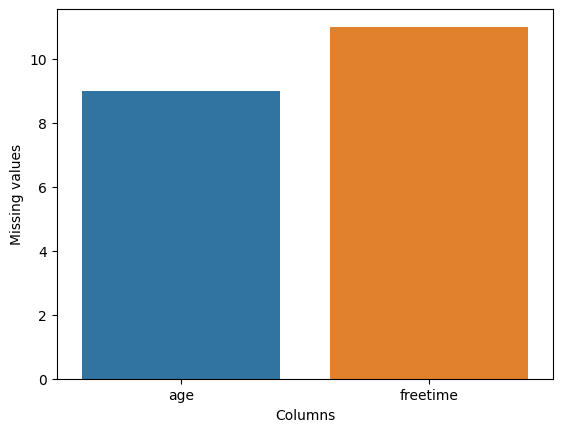

In [17]:
# Skapa en ny funktion? tar inte det bort poängen med att göra funktioner jag använder funktionen från uppg 1
barplot_of_missing(missing_mod_df)
# Hum där ser man 

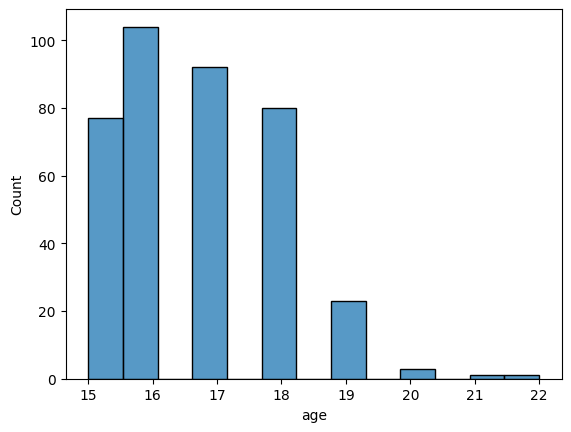

In [18]:
# B) 
sns.histplot(missing_mod_df, x = 'age' )
plt.show()

# Eftersom distrubritionen är förstjuten åt vänster 
# skulle jag säga att median är bättre ersättning än medelvärde
# medelvärde skulle ge en mer missvisande bild..

In [19]:
# C)
missing_mod_df.columns
# Nej jag kan inte hitta någon annan kolumn som skulle kunna ge ledtrådar om ålder? 
# Higher? att de är intresserade att läsa vidare eller inte, varför är det en ledtråd för ålder?

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [20]:
# D)
missing_mod_df['higher'].value_counts()

higher
yes    372
no      18
Name: count, dtype: int64

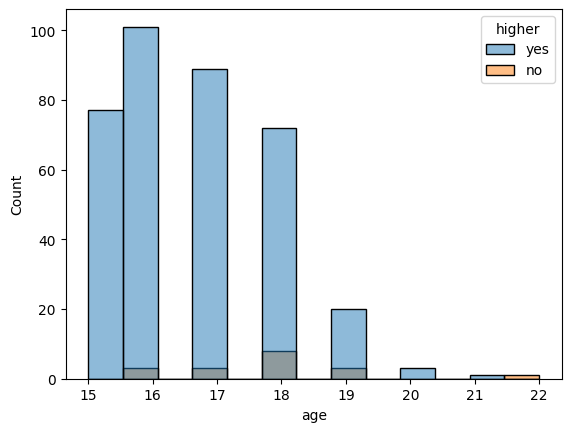

In [21]:
# E) 
sns.histplot(missing_mod_df, x = 'age' , hue='higher')
plt.show()

# Något mindre förskjutet åt vänster i inte intresserad av vidareutbildning?

In [22]:
missing_mod_df['Alcohol'] = missing_mod_df['Dalc'] + missing_mod_df['Walc']
missing_mod_df.tail(10)

C:\Users\Lisa\AppData\Local\Temp\ipykernel_21988\3251888856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_mod_df['Alcohol'] = missing_mod_df['Dalc'] + missing_mod_df['Walc']


,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alcohol
384,384,MS,M,18.0,R,GT3,T,4,2,other,...,4.0,3.0,4,3,3.0,14.0,6,5,5,7
386,386,MS,F,18.0,R,GT3,T,4,4,teacher,...,4.0,3.0,2,2,5.0,7.0,6,5,6,4
387,387,MS,F,19.0,R,GT3,T,2,3,services,...,4.0,2.0,1,2,5.0,0.0,7,5,0,3
388,388,MS,F,18.0,U,LE3,T,3,1,teacher,...,3.0,4.0,1,1,1.0,0.0,7,9,8,2
389,389,MS,F,18.0,U,GT3,T,1,1,other,...,1.0,1.0,1,1,5.0,0.0,6,5,0,2
390,390,MS,M,20.0,U,LE3,A,2,2,services,...,5.0,4.0,4,5,4.0,11.0,9,9,9,9
391,391,MS,M,17.0,U,LE3,T,3,1,services,...,4.0,5.0,3,4,2.0,3.0,14,16,16,7
392,392,MS,M,21.0,R,GT3,T,1,1,other,...,5.0,3.0,3,3,3.0,3.0,10,8,7,6
393,393,MS,M,18.0,R,LE3,T,3,2,services,...,4.0,1.0,3,4,5.0,0.0,11,12,10,7
394,394,MS,M,19.0,U,LE3,T,1,1,other,...,2.0,3.0,3,3,5.0,5.0,8,9,9,6


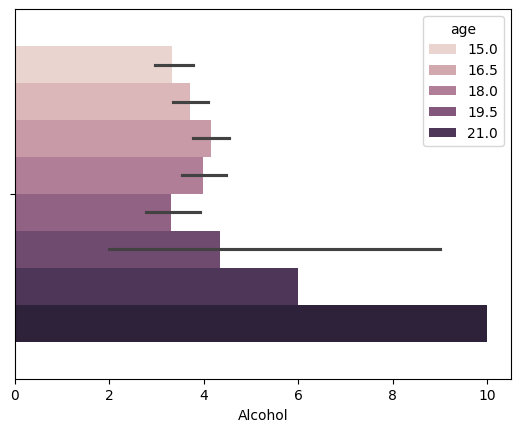

In [23]:
sns.barplot(data = missing_mod_df, x = 'Alcohol', hue= 'age')
plt.show()

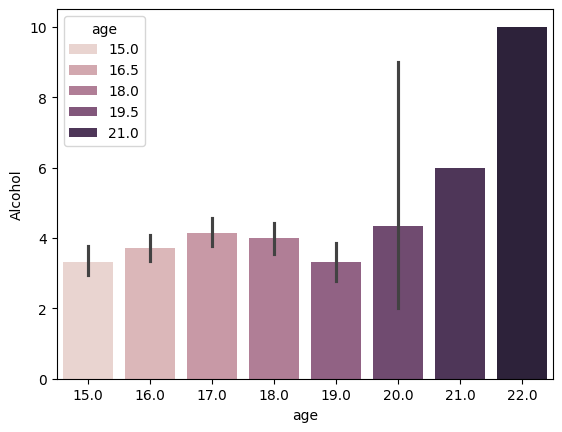

In [24]:
sns.barplot(data=missing_mod_df, x='age', y='Alcohol', hue='age')
plt.show()

# Staplarna visar medel och linjen högsta och lägsta värde?

In [25]:
missing_mod_df['age'].value_counts()

age
16.0    104
17.0     92
18.0     80
15.0     77
19.0     23
20.0      3
22.0      1
21.0      1
Name: count, dtype: int64

In [26]:
missing_mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 394
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  390 non-null    int64  
 1   school      390 non-null    object 
 2   sex         390 non-null    object 
 3   age         381 non-null    float64
 4   address     390 non-null    object 
 5   famsize     390 non-null    object 
 6   Pstatus     390 non-null    object 
 7   Medu        390 non-null    int64  
 8   Fedu        390 non-null    int64  
 9   Mjob        390 non-null    object 
 10  Fjob        390 non-null    object 
 11  reason      390 non-null    object 
 12  guardian    390 non-null    object 
 13  traveltime  390 non-null    int64  
 14  studytime   390 non-null    int64  
 15  failures    390 non-null    int64  
 16  schoolsup   390 non-null    object 
 17  famsup      390 non-null    object 
 18  paid        390 non-null    object 
 19  activities  390 non-null    object

In [27]:
# Ok då ska vi försöka fylla i 
# Först ska vi ta bort rader där åldern är 19 eller äldre

missing_mod_df = missing_mod_df[missing_mod_df['age']<19]
missing_mod_df['age'].value_counts()

age
16.0    104
17.0     92
18.0     80
15.0     77
Name: count, dtype: int64

In [28]:
alc_low_mask = missing_mod_df['Alcohol'] < 4
younger_df = missing_mod_df[alc_low_mask]
older_df = missing_mod_df[~alc_low_mask]
print(f'The mean for students with a lower alcohol conumtion is     {younger_df['age'].mean().round(2)}')
print(f'The mean for students with a higher alcohol conumtion is    {older_df['age'].mean().round(2)}')
print(f'The median for students with a lower alcohol conumtion is     {younger_df['age'].median()}')
print(f'The median for students with a higher alcohol conumtion is    {older_df['age'].median()}')

# Hm ställer mig skeptisk till slutsatsen som dragits i uppgiften...

The mean for students with a lower alcohol conumtion is     16.36
The mean for students with a higher alcohol conumtion is    16.65
The median for students with a lower alcohol conumtion is     16.0
The median for students with a higher alcohol conumtion is    17.0


In [29]:
# Jaja det är ju bara träning nu fyller vi i värderna som vi fått i uppgit att göra.
# Gör om age saknas masken på det modifierade datasettet
#age_missing_mask = missing_mod_df['age'].isnull()
#age_missing_mask.value_counts()

# från A då vi har elever med åldrar som saknas
all_missing_df = missing_mod_df.loc[missing_mod_df.isnull().any(axis=1), :]
all_missing_df


,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alcohol
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,NaN,3.0,1,3,1.0,4.0,13,14,14,4
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,NaN,5.0,1,1,3.0,0.0,7,9,8,2
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,NaN,2.0,2,2,5.0,0.0,12,0,0,4
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,NaN,5.0,2,5,5.0,0.0,8,9,10,7
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,NaN,4.0,3,5,5.0,6.0,12,13,14,8
330,330,GP,M,18.0,U,LE3,T,2,2,other,...,NaN,5.0,2,4,5.0,2.0,9,8,8,6
343,343,GP,F,17.0,U,GT3,A,2,2,at_home,...,NaN,1.0,1,2,4.0,0.0,9,8,0,3
359,359,MS,F,18.0,U,LE3,T,1,1,at_home,...,NaN,2.0,1,1,4.0,0.0,18,16,16,2
372,372,MS,F,17.0,U,GT3,T,2,2,other,...,NaN,3.0,1,1,3.0,8.0,13,11,11,2


In [30]:
missing_mod_df.info()
#Ok när vi försökte ta bort de över 19 tog vi bort ca 40 elever?

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 0 to 393
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  353 non-null    int64  
 1   school      353 non-null    object 
 2   sex         353 non-null    object 
 3   age         353 non-null    float64
 4   address     353 non-null    object 
 5   famsize     353 non-null    object 
 6   Pstatus     353 non-null    object 
 7   Medu        353 non-null    int64  
 8   Fedu        353 non-null    int64  
 9   Mjob        353 non-null    object 
 10  Fjob        353 non-null    object 
 11  reason      353 non-null    object 
 12  guardian    353 non-null    object 
 13  traveltime  353 non-null    int64  
 14  studytime   353 non-null    int64  
 15  failures    353 non-null    int64  
 16  schoolsup   353 non-null    object 
 17  famsup      353 non-null    object 
 18  paid        353 non-null    object 
 19  activities  353 non-null    object

---
## 3. Clean freetime column (**)

Now there are missing data on freetime that needs to be filled. 
- Try yourself and find reasonable approaches for how you would fill those missing data.
- Document what you have tried and different findings
- Combine suitable visualizations with pandas methods

Link to dataset: https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

Basic Insights:

    a) Begin by reading through the dataset description, which you can find by following the link

    b) Download and load the dataset into a Pandas DataFrame

    c) What is the distribution of billionaires' ages in the dataset?
        Visualization: Create a histogram of billionaire ages.

    d) How many billionaires are self-made (status "D") compared to those who inherited their wealth (status "U")?
        Visualization: Create a bar chart or pie chart to illustrate the distribution.

Comparative Analysis:
    
    e) Which country has the highest number of billionaires, and what is the most common industry category among them?

        Visualization: Create a bar chart showing the top countries with the most billionaires and a separate bar chart showing the top industries.

    f) Are there any trends or correlations between a country's GDP and the number of billionaires it has?
        
        Visualization: Create a scatter plot to visualize the relationship between GDP and the number of billionaires for each country.

    g) Study the relationship between age and whether a billionaire is self-made. Do younger billionaires tend to be self-made compared to older ones?
        
        Visualization: Create a violin plot showing the age distribution for self-made versus inherited billionaires.